In [1]:
from __future__ import print_function
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [2]:
tf.compat.v1.disable_v2_behavior() # <-- HERE !

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
batch_size = 128
num_classes = 10
epochs = 12

In [6]:
# input image dimensions
img_rows, img_cols = 28, 28

In [5]:
# loading data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
#reshape x_train, x_test
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [8]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#[0-1] preprocessing
x_train /= 255
x_test /= 255

In [10]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [11]:
#one-hot encoding
y_train =to_categorical(y_train, num_classes)
y_test =to_categorical(y_test, num_classes)

In [12]:
# model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.001),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - ETA: 0s - loss: 0.2434 - acc: 0.9262

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


60000/60000 [==============================] - 16s 264us/sample - loss: 0.2434 - acc: 0.9262 - val_loss: 0.0489 - val_acc: 0.9845
Epoch 2/12
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0875 - acc: 0.9735 - val_loss: 0.0406 - val_acc: 0.9861
Epoch 3/12
60000/60000 [==============================] - 7s 119us/sample - loss: 0.0640 - acc: 0.9808 - val_loss: 0.0360 - val_acc: 0.9880
Epoch 4/12
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0525 - acc: 0.9843 - val_loss: 0.0340 - val_acc: 0.9885
Epoch 5/12
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0460 - acc: 0.9858 - val_loss: 0.0314 - val_acc: 0.9902
Epoch 6/12
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0402 - acc: 0.9871 - val_loss: 0.0365 - val_acc: 0.9891
Epoch 7/12
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0351 - acc: 0.9888 - val_loss: 0.0307 - val_acc: 0.9910
Epoch 8/12
60000/60000 [======

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03272438285428376
Test accuracy: 0.9915


In [14]:
pip install shap

     |████████████████████████████████| 564 kB 12.1 MB/s 


In [15]:
#apply shap

import shap
import numpy as np

# select a set of background examples to take an expectation over
background = x_train[np.random.choice(x_train.shape[0],100, replace = False)]

# explain predictions of the model on three images
e = shap.DeepExplainer(
    (model.layers[0].input, model.layers[-1].output), background
)

shap_values = e.shap_values(x_test[1:5])

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


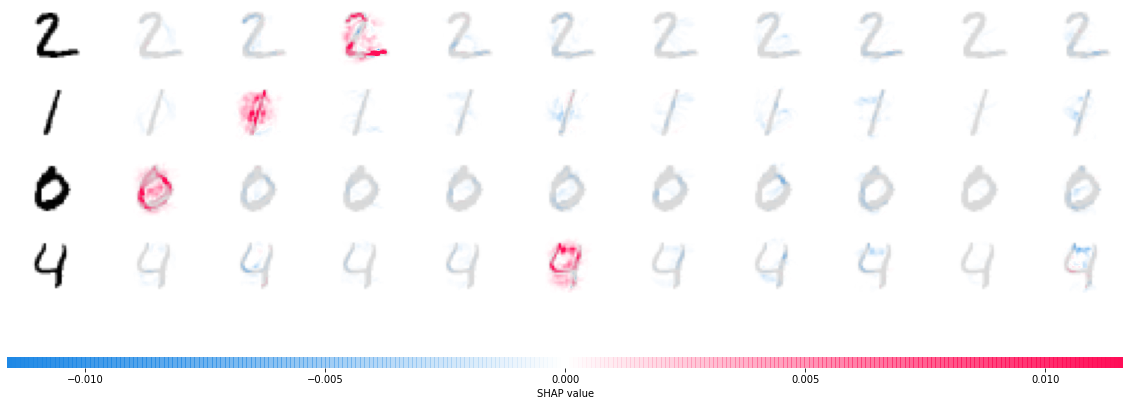

In [16]:
# plot the feature attributions
shap.image_plot(shap_values, -x_test[1:5])

The plot above shows the explanations for each class on four predictions. Note that the explanations are ordered for the classes 0-9 going left to right along the rows.